ANOMALY DETECTION METHODS:

LOF 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
7                  5.0               3.4                1.5               0.2   
26                 5.0               3.4                1.6               0.4   
74                 6.4               2.9                4.3               1.3   
78                 6.0               2.9                4.5               1.5   
87                 6.3               2.3                4.4               1.3   
91                 6.1               3.0                4.6               1.4   
110                6.5               3.2                5.1               2.0   
127                6.1               3.0                4.9               1.8   

     target  
7         0  
26        0  
74        1  
78        1  
87        1  
91        1  
110       2  
127       2  


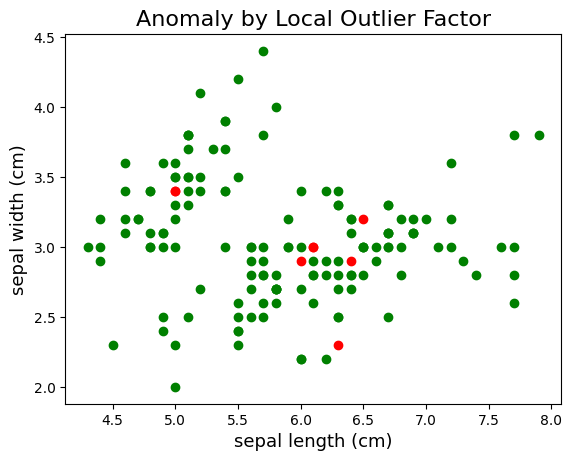

In [50]:
#LOF FOR ANOMALY DETECTION: 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.neighbors import LocalOutlierFactor 

#dataset 
df = load_iris(as_frame=True).frame 

X = df[['sepal length (cm)','sepal width (cm)']] 

#print(df.info())
#print(X)

#model definitions (remember to set n_neighbours to a small no. if data is too sensitive and higher if vice versa)
lof = LocalOutlierFactor(n_neighbors=3) 

# Fit the model to the data 
lof.fit(X) 

#to calculate the outlier scores for each point in the dataset 
scores = lof.negative_outlier_factor_ 

#this is for points with an anomaly greater than the 95th percentile, meaning the farthest outliers 
outliers = np.argwhere(scores > np.percentile(scores, 95)) 

#print(len(outliers))

#to print
outliers_indices = outliers.flatten()
outlier_df = df.iloc[outliers_indices]
print(outlier_df)


colors=['green','red'] 

for i in range(len(X)): 
	if i not in outliers: 
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) #points that are not anomalies 
	else: 
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) #points that are anomalies 
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)		 
plt.title('Anomaly by Local Outlier Factor',fontsize=16)		 
plt.show() 


ISOLATION FOREST: 

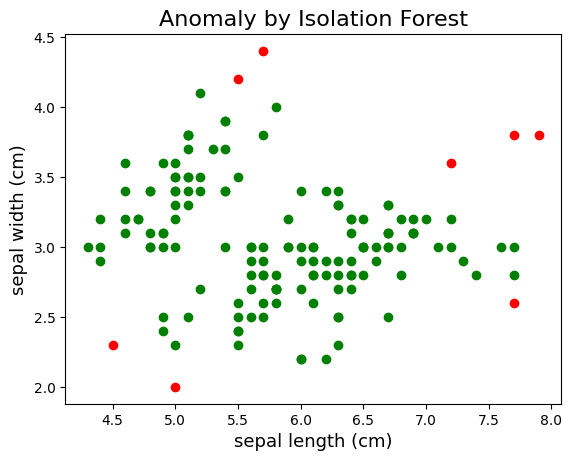

In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.ensemble import IsolationForest 

df = load_iris(as_frame=True).frame 
X = df[['sepal length (cm)','sepal width (cm)']] 

#Defining the model 
model = IsolationForest(contamination=0.05) 

model.fit(X) 

#this is to calculate the outlier scores of each point in X: 
scores = model.decision_function(X) 

#identification of outliers, i.e, points with the highest scores: 
outliers = np.argwhere(scores < np.percentile(scores, 5)) 

outliers_indices = outliers.flatten()
outlier_df1 = df.iloc[outliers_indices]
#print(outlier_df)

colors=['green','red'] 

for i in range(len(X)): 
	if i not in outliers: 
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly 
	else: 
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly 
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)		 
plt.title('Anomaly by Isolation Forest',fontsize=16)		 
plt.show()


ELLIPTIC ENVELOPE (ROBUST) : wont work when the data is not unimodal 

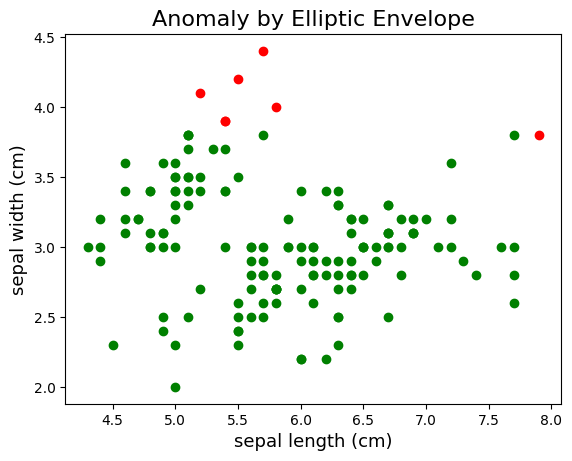

   sepal length (cm)  sepal width (cm)  petal length (cm)_x  \
0                5.7               4.4                  1.5   
1                5.5               4.2                  1.4   
2                7.9               3.8                  6.4   

   petal width (cm)_x  target_x  petal length (cm)_y  petal width (cm)_y  \
0                 0.4         0                  1.5                 0.4   
1                 0.2         0                  1.4                 0.2   
2                 2.0         2                  6.4                 2.0   

   target_y  
0         0  
1         0  
2         2  


In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.covariance import EllipticEnvelope 

df = load_iris(as_frame=True).frame 
X = df[['sepal length (cm)','sepal width (cm)']] 

# model defining 
model = EllipticEnvelope(contamination=0.05) 

model.fit(X) 

#outlier score for each point is calculated 
scores = model.decision_function(X) 

#identification of points with highest outlier score
outliers = np.argwhere(scores < np.percentile(scores, 5)) 

outliers_indices = outliers.flatten()
outlier_df2 = df.iloc[outliers_indices]
#print(outlier_df)
 
colors=['green','red'] 

for i in range(len(X)): 
	if i not in outliers: 
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # not an anomaly
	else: 
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomaly
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)		 
plt.title('Anomaly by Elliptic Envelope',fontsize=16)		 
plt.show()


common_df = pd.merge(outlier_df1, outlier_df2, on=['sepal length (cm)', 'sepal width (cm)'])

print(common_df)